In [1]:
import glob
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# CDR(Clinical dementia rating)
Based on Memory, 
Orientation, 
Judgment and problem sloving, 
Community affairs, 
Home and hobby, 
Personal care, 


In [9]:
FolderName = glob.glob('/workspace/brail_poc3/experiments/Behavioural_Data_MPILMBB_LEMON/Cognitive_Test_Battery_LEMON/*')
CogTestBatName = [item.split('/')[-1] if item.split('/')[-1][-1] != '_' else item.split('/')[-1][:-1] for item in FolderName]
# CogTestBatName

CsvList = glob.glob('/workspace/brail_poc3/experiments/Behavioural_Data_MPILMBB_LEMON/Cognitive_Test_Battery_LEMON/*/*.csv')
CogTestBat = []
for i in CsvList:
    TempPd = pd.read_csv(i)
    CogTestBat.append(TempPd)
# CogTestBat

for i,j in zip(CogTestBatName, CogTestBat):
    print(i, j)

CVLT      Unnamed: 0  CVLT_1  CVLT_2  CVLT_3  CVLT_4  CVLT_5  CVLT_6  CVLT_7  \
0    sub-032311       1       7    16.0   1.075   0.226    60.0    58.0   
1    sub-032309       1       9    11.0  -1.644   1.226    53.0    51.0   
2    sub-032382       1       6    12.0  -1.286   0.672    48.0    48.0   
3    sub-032302       1       9    15.0  -1.644   0.426    63.0    60.0   
4    sub-032315       1       7    13.0   0.502   0.117    53.0    51.0   
..          ...     ...     ...     ...     ...     ...     ...     ...   
223  sub-032304       1       9     7.0  -1.071   0.608    43.0    42.0   
224  sub-032439       1       8    15.0   0.574   0.426    62.0    61.0   
225  sub-032440       1      10    16.0  -1.000   0.226    72.0    71.0   
226  sub-032441       1       6    10.0  -0.141   1.426    49.0    48.0   
227  sub-032525       1       7     7.0  -0.642   3.798    45.0    44.0   

     CVLT_8  CVLT_9  CVLT_10  CVLT_11  CVLT_12  CVLT_13  CVLT_14  CVLT_15  \
0         8      

In [10]:
CogTestBatName

['CVLT',
 'RWT',
 'TMT',
 'TAP_Incompatibility',
 'TAP_Alertness',
 'WST',
 'LPS',
 'TAP_Working_Memory']

In [11]:
CogTestBat[4].describe()

,TAP_A_1,TAP_A_2,TAP_A_3,TAP_A_4,TAP_A_5,TAP_A_6,TAP_A_8,TAP_A_10,TAP_A_11,TAP_A_13,TAP_A_15
count,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000
mean,228.982379,233.493392,229.409692,230.436123,234.867841,228.396476,36.264317,236.074890,231.123348,36.295154,-0.006554
std,68.985375,63.713155,56.357931,47.590520,52.542020,48.544402,31.912501,58.373217,58.194690,26.198462,0.092515
min,162.000000,158.000000,158.000000,157.000000,165.000000,159.000000,9.000000,157.000000,159.000000,11.000000,-0.372000
25%,196.000000,202.000000,199.000000,199.000000,204.000000,198.000000,22.000000,204.000000,201.500000,22.500000,-0.046000
50%,214.000000,218.000000,217.000000,219.000000,221.000000,217.000000,28.000000,221.000000,217.000000,29.000000,-0.003000
75%,239.000000,248.000000,243.500000,244.000000,250.000000,244.500000,41.000000,252.000000,244.000000,40.000000,0.034500
max,942.000000,797.000000,563.000000,446.000000,619.000000,573.000000,363.000000,672.000000,694.000000,290.000000,0.502000


In [12]:
# exclude 
# sub-032336

CogTestBat[4].iloc[42:55,:]

,Unnamed: 0,TAP_A_1,TAP_A_2,TAP_A_3,TAP_A_4,TAP_A_5,TAP_A_6,TAP_A_7,TAP_A_8,TAP_A_9,TAP_A_10,TAP_A_11,TAP_A_12,TAP_A_13,TAP_A_14,TAP_A_15,TAP_A_16,TAP_A_17
42,sub-032336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43,sub-032329,216.0,216.0,230.0,226.0,227.0,224.0,79,23.0,97,230.0,222.0,73,30.0,84,0.007,34,NaN
44,sub-032431,293.0,302.0,276.0,320.0,342.0,302.0,21,94.0,7,300.0,296.0,14,66.0,27,0.020,38,NaN
45,sub-032335,232.0,215.0,237.0,220.0,236.0,225.0,73,37.0,69,225.0,217.0,76,33.0,76,0.036,46,NaN
46,sub-032337,193.0,227.0,236.0,199.0,204.0,198.0,96,26.0,93,255.0,236.0,54,67.0,27,-0.182,4,NaN
47,sub-032339,273.0,223.0,232.0,446.0,375.0,359.0,10,99.0,7,240.0,226.0,76,47.0,54,0.502,>99,NaN
48,sub-032306,226.0,215.0,217.0,234.0,236.0,231.0,69,27.0,90,218.0,217.0,79,23.0,96,0.062,58,NaN
49,sub-032338,180.0,199.0,214.0,233.0,213.0,195.0,88,44.0,42,212.0,206.0,76,24.0,90,-0.051,14,NaN
50,sub-032340,251.0,197.0,223.0,244.0,254.0,248.0,58,38.0,69,212.0,208.0,86,38.0,66,0.172,90,NaN
51,sub-032341,228.0,258.0,237.0,233.0,233.0,232.0,79,22.0,99,257.0,243.0,50,42.0,62,-0.046,14,NaN


In [13]:
# TAP-A

df = CogTestBat[4].copy()
df = df[~df['Unnamed: 0'].isin(['sub-032342', 'sub-032336'])]
df_id = df['Unnamed: 0'].tolist()
df_TAPA = df
exclude = ['TAP_A_7', 'TAP_A_9', 'TAP_A_12', 'TAP_A_14', 'TAP_A_16', 'TAP_A_17']
columns = df.columns[1:-1].values
columns = [item for item in columns.tolist() if item not in exclude]
# print(columns)
# ['TAP_A_1','TAP_A_2','TAP_A_3','TAP_A_4','TAP_A_5','TAP_A_6','TAP_A_8','TAP_A_10','TAP_A_11','TAP_A_13','TAP_A_15']
CustomMin = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1]
CustomMax = [1000, 1000, 1000, 1000, 1000, 1000, 500, 1000, 1000, 500, 1]
print(df[columns])
df2array = df[columns].values
MinMax = np.array([CustomMin, CustomMax])
mmscaler = MinMaxScaler(feature_range=(0, 1), copy=True)
mmscaler.fit(MinMax.astype('float'))
scaled_sample = mmscaler.transform(df2array)

print(scaled_sample)
# df['CVLT_1'].tolist()

     TAP_A_1  TAP_A_2  TAP_A_3  TAP_A_4  TAP_A_5  TAP_A_6  TAP_A_8  TAP_A_10  \
0      225.0    225.0    230.0    242.0    243.0    233.0     35.0     233.0   
1      192.0    248.0    191.0    190.0    206.0    192.0     54.0     223.0   
2      201.0    223.0    198.0    194.0    199.0    198.0     17.0     211.0   
3      200.0    201.0    213.0    216.0    211.0    207.0     21.0     203.0   
4      162.0    160.0    158.0    157.0    165.0    159.0     32.0     157.0   
..       ...      ...      ...      ...      ...      ...      ...       ...   
223    236.0    229.0    255.0    238.0    235.0    237.0     24.0     246.0   
224    194.0    226.0    227.0    204.0    204.0    198.0     26.0     225.0   
225    209.0    208.0    206.0    210.0    204.0    209.0     28.0     208.0   
226    224.0    283.0    233.0    199.0    219.0    217.0     23.0     265.0   
227    200.0    219.0    204.0    199.0    204.0    199.0     20.0     217.0   

     TAP_A_11  TAP_A_13  TAP_A_15  
0  

In [15]:
# TAP-I

df2 = CogTestBat[3].copy()
df2 = df2[~df2['Unnamed: 0'].isin(['sub-032342', 'sub-032336'])]
df_id2 = df2['Unnamed: 0'].tolist()
df_TAPI = df2
exclude = ['TAP_I_3', 'TAP_I_5', 'TAP_I_7', 'TAP_I_10', 'TAP_I_12', 'TAP_I_14', 'TAP_I_17', 'TAP_I_19', 'TAP_I_21', 
           'TAP_I_22', 'TAP_I_23', 'TAP_I_24', 'TAP_I_25', 'TAP_I_26', 'TAP_I_27', 'TAP_I_28']
columns = df2.columns[1:-1].values
columns = [item for item in columns.tolist() if item not in exclude]
# print(columns)
# ['TAP_A_1','TAP_A_2','TAP_A_3','TAP_A_4','TAP_A_5','TAP_A_6','TAP_A_8','TAP_A_10','TAP_A_11','TAP_A_13','TAP_A_15']
CustomMin = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
CustomMax = [1100, 1100, 400, 30, 1100, 1100, 400, 30, 1100, 1100, 400, 60]
print(df2[columns])
df2array = df2[columns].values
MinMax = np.array([CustomMin, CustomMax])
mmscaler = MinMaxScaler(feature_range=(0, 1), copy=True)
mmscaler.fit(MinMax.astype('float'))
scaled_sample2 = mmscaler.transform(df2array)

print(scaled_sample2)

     TAP_I_1  TAP_I_2  TAP_I_4  TAP_I_6  TAP_I_8  TAP_I_9  TAP_I_11  TAP_I_13  \
0        347      324       72        2    383.0    373.0      49.0         2   
1        561      547      102        1    532.0    509.0      68.0         2   
2        401      392       65        0    396.0    384.0      51.0         1   
3        420      413       89        0    460.0    439.0     108.0         0   
4        303      293       70        1    338.0    327.0      42.0         8   
..       ...      ...      ...      ...      ...      ...       ...       ...   
223      412      413       56        0    494.0    501.0      51.0         0   
224      365      364       53        0    388.0    379.0      61.0         1   
225      298      283       51        3    335.0    339.0      26.0         1   
226      424      434       55        0    466.0    448.0      73.0         0   
227      396      375       67        1    451.0    451.0      74.0         1   

     TAP_I_15  TAP_I_16  TA

In [16]:
TAPAI = np.concatenate([scaled_sample, scaled_sample2], 1)

In [17]:
pca = PCA(n_components=2, whiten=False)
pca.fit(TAPAI)
X_pca = pca.fit_transform(TAPAI)

In [18]:
for index, i in enumerate(X_pca.T[0]):
    print(index, df_id[index], i)

0 sub-032311 -0.23538121792235436
1 sub-032309 0.10386483498025806
2 sub-032382 -0.22451424636422285
3 sub-032302 -0.06073967601980872
4 sub-032315 -0.35030863498655274
5 sub-032314 -0.18733043689954043
6 sub-032316 -0.20333368945603478
7 sub-032383 0.027739749592981228
8 sub-032307 -0.35314562770529906
9 sub-032310 -0.3170596424254451
10 sub-032312 -0.24623014463689386
11 sub-032317 -0.2249018916795454
12 sub-032404 -0.12126401989397285
13 sub-032318 -0.01071300336852837
14 sub-032319 -0.3105623291086234
15 sub-032386 -0.18996748103301148
16 sub-032320 -0.2083210158610136
17 sub-032321 0.006674376163666482
18 sub-032322 0.16906433869078902
19 sub-032394 -0.1871558001057164
20 sub-032324 0.07325279503490928
21 sub-032323 -0.029092247851783545
22 sub-032528 -0.013512559084706928
23 sub-032325 -0.11207985161060491
24 sub-032313 0.23858493592462796
25 sub-032405 0.06566861597172345
26 sub-032384 -0.2135817446349556
27 sub-032407 -0.09995398341501786
28 sub-032327 -0.07075850716470852
29 s

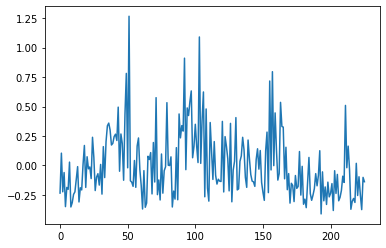

In [19]:
plt.plot(X_pca.T[0])

In [20]:
X_pca

array([[-2.35381218e-01,  9.30058353e-02],
       [ 1.03864835e-01, -5.96729215e-02],
       [-2.24514246e-01, -3.40033420e-02],
       [-6.07396760e-02, -1.06610892e-01],
       [-3.50308635e-01,  1.65646940e-01],
       [-1.87330437e-01, -1.63730347e-02],
       [-2.03333689e-01,  1.25810243e-02],
       [ 2.77397496e-02, -7.18986068e-02],
       [-3.53145628e-01, -2.71221358e-02],
       [-3.17059642e-01,  4.51425168e-03],
       [-2.46230145e-01, -3.42861211e-02],
       [-2.24901892e-01,  8.50523141e-02],
       [-1.21264020e-01, -1.02768551e-01],
       [-1.07130034e-02, -1.22434704e-01],
       [-3.10562329e-01, -1.56916096e-02],
       [-1.89967481e-01, -7.99630568e-02],
       [-2.08321016e-01, -2.53888317e-02],
       [ 6.67437616e-03, -3.14071995e-02],
       [ 1.69064339e-01, -5.66758386e-02],
       [-1.87155800e-01, -3.70754087e-02],
       [ 7.32527950e-02, -9.35932300e-02],
       [-2.90922479e-02,  2.51758835e-01],
       [-1.35125591e-02, -8.74823196e-02],
       [-1.

In [21]:
pca.explained_variance_ratio_

array([0.52042112, 0.16298824])

In [22]:
X_pca.T[0].shape

(226,)

In [23]:
# Get cognitive status

Cog_score = pd.read_csv("/workspace/brail_poc3/notebooks/Chen/TestCognitive.csv")
Cog_score = Cog_score.loc[:, ["ID", "Label"]]
Age_data = pd.read_csv("/workspace/brail_poc3/experiments/Behavioural_Data_MPILMBB_LEMON/META_File_IDs_Age_Gender_Education_Drug_Smoke_SKID_LEMON.csv")
Age_data = Age_data.loc[:, ["Subject", "Age"]]
Age_data = Age_data.rename({'Subject': 'ID'}, axis='columns')

def convert_age_range(age_range):
    # ハイフンで文字列を分割し、最初の部分を取得
    return int(age_range.split("-")[0])

Age_data["Age_1"] = Age_data["Age"].apply(convert_age_range)
Age_data.drop("Age", axis=1, inplace=True)

cog_df = Cog_score.merge(Age_data, on='ID', how='left')
ground_truth = cog_df[cog_df['Age_1'] >= 40]
Elder_group = ground_truth['ID'].tolist()

GT1 = ground_truth[ground_truth["Label"] == 1]
GT2 = ground_truth[ground_truth["Label"] == 2]

In [24]:
cog_df2 = Cog_score.merge(Age_data, on='ID', how='right')
cog_df2 = cog_df2[~cog_df2['ID'].isin(['sub-032342', 'sub-032336'])]

cog_df2 = cog_df2.reset_index(drop=True)

In [25]:
cog_df2

,ID,Label,Age_1
0,sub-032311,0.0,20
1,sub-032309,2.0,20
2,sub-032382,0.0,25
3,sub-032302,0.0,20
4,sub-032315,0.0,20
...,...,...,...
221,sub-032304,1.0,25
222,sub-032439,0.0,20
223,sub-032440,0.0,25
224,sub-032441,2.0,25


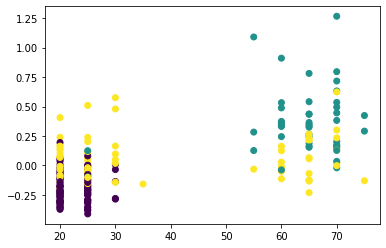

In [26]:
# 散布図

X = cog_df2['Age_1']
y = X_pca.T[0]
label = cog_df2['Label']
plt.scatter(X, y, c=label)

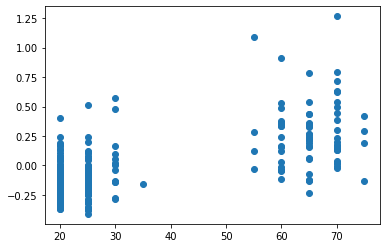

In [122]:
X = cog_df2['Age_1']
y = X_pca.T[0]
plt.scatter(X, y)

In [123]:
cog_df2

,ID,Label,Age_1
0,sub-032311,0.0,20
1,sub-032309,2.0,20
2,sub-032382,0.0,25
3,sub-032302,0.0,20
4,sub-032315,0.0,20
...,...,...,...
221,sub-032304,1.0,25
222,sub-032439,0.0,20
223,sub-032440,0.0,25
224,sub-032441,2.0,25


In [27]:
ground_truth = cog_df2[cog_df2['Age_1'] < 40]
ground_truth
under20 = [value for index, value in enumerate(X_pca.T[0]) if index in ground_truth.index.tolist()]
for index, i in enumerate(under20):
    print(index, ground_truth.iloc[index, 0], i)

0 sub-032311 -0.23538121792235436
1 sub-032309 0.10386483498025806
2 sub-032382 -0.22451424636422285
3 sub-032302 -0.06073967601980872
4 sub-032315 -0.35030863498655274
5 sub-032314 -0.18733043689954043
6 sub-032316 -0.20333368945603478
7 sub-032307 -0.35314562770529906
8 sub-032310 -0.3170596424254451
9 sub-032312 -0.24623014463689386
10 sub-032317 -0.2249018916795454
11 sub-032404 -0.12126401989397285
12 sub-032319 -0.3105623291086234
13 sub-032386 -0.18996748103301148
14 sub-032320 -0.2083210158610136
15 sub-032321 0.006674376163666482
16 sub-032322 0.16906433869078902
17 sub-032394 -0.1871558001057164
18 sub-032324 0.07325279503490928
19 sub-032323 -0.029092247851783545
20 sub-032528 -0.013512559084706928
21 sub-032325 -0.11207985161060491
22 sub-032313 0.23858493592462796
23 sub-032405 0.06566861597172345
24 sub-032384 -0.2135817446349556
25 sub-032407 -0.09995398341501786
26 sub-032327 -0.07075850716470852
27 sub-032414 -0.16734329580443674
28 sub-032418 0.007969733847923122
29 s

In [28]:
ground_truth = cog_df2[cog_df2['Age_1'] > 40]
ground_truth
over50 = [value for index, value in enumerate(X_pca.T[0]) if index in ground_truth.index.tolist()]
for index, i in enumerate(over50):
    print(index, ground_truth.iloc[index, 0], i)

0 sub-032383 0.027739749592981228
1 sub-032318 -0.01071300336852837
2 sub-032415 0.15923129574765174
3 sub-032331 0.20142699302827033
4 sub-032305 0.33593988406242004
5 sub-032308 0.35910801511727036
6 sub-032428 0.30055827587009337
7 sub-032333 0.17303325763125407
8 sub-032430 0.18663119286044144
9 sub-032301 0.24506641847030317
10 sub-032303 0.26497930211911247
11 sub-032329 0.21130709615431692
12 sub-032431 0.49457652438223143
13 sub-032335 -0.049778901027762494
14 sub-032337 0.2665398142046167
15 sub-032339 0.1863242307303339
16 sub-032306 -0.12620173664463
17 sub-032338 0.4338842999716362
18 sub-032340 0.7810336750884712
19 sub-032341 -0.020558432236152464
20 sub-032442 1.2664622687613991
21 sub-032347 -0.13070323996278516
22 sub-032343 0.23282130064123996
23 sub-032369 0.5326745863600347
24 sub-032372 0.15066755197288959
25 sub-032373 0.43662483754086706
26 sub-032443 0.23369773499424384
27 sub-032376 0.3376732654617825
28 sub-032374 0.29093116403864794
29 sub-032450 0.9105353751

In [37]:
cog_df2['Age_1'].unique()

array([20, 25, 60, 30, 70, 65, 75, 55, 35])

In [46]:
age = []
for i in np.sort(cog_df2['Age_1'].unique()):
    temp = cog_df2[cog_df2['Age_1'] == i]
    a20 = [value for index, value in enumerate(X_pca.T[0]) if index in temp.index.tolist()]
    age.append(a20)
#     for index, i in enumerate(a20):
#         print(index, temp.iloc[index, 0], i)


In [29]:
df.iloc[30:40,:]

,Unnamed: 0,TAP_A_1,TAP_A_2,TAP_A_3,TAP_A_4,TAP_A_5,TAP_A_6,TAP_A_7,TAP_A_8,TAP_A_9,TAP_A_10,TAP_A_11,TAP_A_12,TAP_A_13,TAP_A_14,TAP_A_15,TAP_A_16,TAP_A_17
30,sub-032418,188.0,203.0,186.0,192.0,189.0,188.0,88,18.0,88,204.0,195.0,66,51.0,18,-0.034,18,NaN
31,sub-032326,210.0,204.0,209.0,212.0,210.0,210.0,62,18.0,88,208.0,206.0,50,20.0,79,0.019,38,NaN
32,sub-032415,272.0,236.0,238.0,233.0,267.0,264.0,21,42.0,46,255.0,236.0,38,58.0,24,0.110,76,NaN
33,sub-032332,227.0,235.0,211.0,193.0,207.0,205.0,82,28.0,76,225.0,216.0,54,42.0,38,-0.052,14,NaN
34,sub-032331,222.0,230.0,240.0,220.0,232.0,222.0,76,31.0,76,240.0,238.0,42,37.0,62,-0.073,10,NaN
35,sub-032305,210.0,270.0,218.0,251.0,240.0,232.0,50,37.0,58,267.0,247.0,31,72.0,16,-0.063,12,NaN
36,sub-032308,218.0,237.0,230.0,217.0,223.0,218.0,76,15.0,>99,237.0,232.0,50,23.0,93,-0.063,12,NaN
37,sub-032428,274.0,489.0,316.0,346.0,323.0,309.0,18,80.0,12,389.0,365.0,4,118.0,7,-0.162,4,NaN
38,sub-032333,311.0,256.0,241.0,220.0,282.0,257.0,38,73.0,12,247.0,250.0,31,29.0,82,0.028,42,NaN
39,sub-032430,310.0,162.0,249.0,252.0,305.0,298.0,18,62.0,24,248.0,232.0,58,91.0,12,0.244,98,NaN


In [30]:
targetCol = 'TAP_A_5'
cog_df2['TAPA'] = X_pca.T[0]

cog_df2[targetCol] = df_TAPA[targetCol].reset_index(drop=True)
bins = np.linspace(-0.5, 2, 26)
scores = cog_df2['TAPA']
freq = scores.value_counts(bins=bins, sort=False)
cog_df2['TAPA_bins'] = pd.cut(cog_df2['TAPA'], bins)
bin_means = cog_df2.groupby('TAPA_bins')[targetCol].max()
bin_means

TAPA_bins
(-0.5, -0.4]    196.0
(-0.4, -0.3]    247.0
(-0.3, -0.2]    259.0
(-0.2, -0.1]    275.0
(-0.1, 0.0]     387.0
(0.0, 0.1]      342.0
(0.1, 0.2]      375.0
(0.2, 0.3]      337.0
(0.3, 0.4]      323.0
(0.4, 0.5]      343.0
(0.5, 0.6]      416.0
(0.6, 0.7]      328.0
(0.7, 0.8]      619.0
(0.8, 0.9]        NaN
(0.9, 1.0]      378.0
(1.0, 1.1]      255.0
(1.1, 1.2]        NaN
(1.2, 1.3]      268.0
(1.3, 1.4]        NaN
(1.4, 1.5]        NaN
(1.5, 1.6]        NaN
(1.6, 1.7]        NaN
(1.7, 1.8]        NaN
(1.8, 1.9]        NaN
(1.9, 2.0]        NaN
Name: TAP_A_5, dtype: float64

In [31]:
cog_df2['TAPA'] = X_pca.T[0]

targetCol = 'TAP_A_5'
cog_df2[targetCol] = df_TAPA[targetCol].reset_index(drop=True)
bins = np.linspace(-0.5, 2, 26)
scores = cog_df2['TAPA']
freq = scores.value_counts(bins=bins, sort=False)
cog_df2['TAPA_bins'] = pd.cut(cog_df2['TAPA'], bins)
bin_means_TAP_A_5 = cog_df2.groupby('TAPA_bins')[targetCol].max()

targetCol = 'TAP_A_10'
cog_df2[targetCol] = df_TAPA[targetCol].reset_index(drop=True)
bins = np.linspace(-0.5, 2, 26)
scores = cog_df2['TAPA']
freq = scores.value_counts(bins=bins, sort=False)
cog_df2['TAPA_bins'] = pd.cut(cog_df2['TAPA'], bins)
bin_means_TAP_A_10 = cog_df2.groupby('TAPA_bins')[targetCol].max()

targetCol = 'TAP_I_15'
cog_df2[targetCol] = df_TAPI[targetCol].reset_index(drop=True)
bins = np.linspace(-0.5, 2, 26)
scores = cog_df2['TAPA']
freq = scores.value_counts(bins=bins, sort=False)
cog_df2['TAPA_bins'] = pd.cut(cog_df2['TAPA'], bins)
bin_means_TAP_A_15 = cog_df2.groupby('TAPA_bins')[targetCol].max()

In [48]:
np.sort(cog_df2['Age_1'].unique())

array([20, 25, 30, 35, 55, 60, 65, 70, 75])

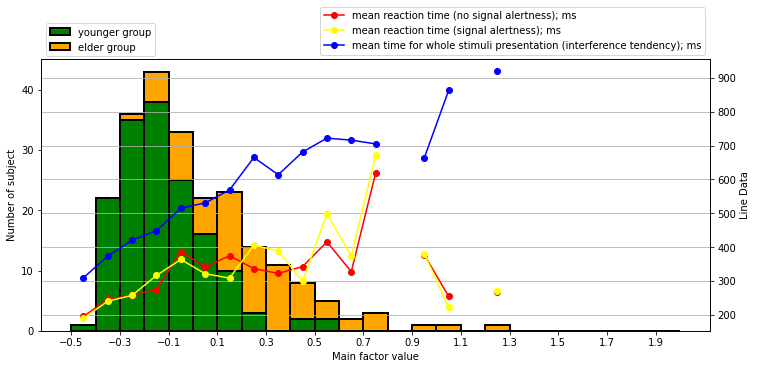

In [60]:
# 度数分布表  of pd

bins = np.linspace(-0.5, 2, 26)
scores = pd.Series(X_pca.T[0])
freq = scores.value_counts(bins=bins, sort=False)
class_value = [round(i, 2) for i in (bins[:-1] + bins[1:]) / 2]  # 階級値
rel_freq = freq / scores.count()  # 相対度数
cum_freq = freq.cumsum()  # 累積度数
rel_cum_freq = rel_freq.cumsum()  # 相対累積度数

scores20 = pd.Series(under20)
freq20 = scores20.value_counts(bins=bins, sort=False)
class_value20 = [round(i, 2) for i in (bins[:-1] + bins[1:]) / 2]  # 階級値
rel_freq20 = freq20 / scores20.count()  # 相対度数
cum_freq20 = freq20.cumsum()  # 累積度数
rel_cum_freq20 = rel_freq20.cumsum()  # 相対累積度数

scores50 = pd.Series(over50)
freq50 = scores50.value_counts(bins=bins, sort=False)
class_value50 = [round(i, 2) for i in (bins[:-1] + bins[1:]) / 2]  # 階級値
rel_freq50 = freq50 / scores50.count()  # 相対度数
cum_freq50 = freq50.cumsum()  # 累積度数
rel_cum_freq50 = rel_freq50.cumsum()  # 相対累積度数

dist = pd.DataFrame(
    {
        "階級値": class_value,
        "度数": freq,
        "相対度数": rel_freq,
        "累積度数": cum_freq,
        "相対累積度数": rel_cum_freq,
    },
    index=freq.index
)

fig, ax = plt.subplots(figsize=[12,5])

ax.bar(class_value20, freq20, color="green", ec="k", width=0.1, lw=2, label='younger group')
ax.bar(class_value50, freq50, color="orange", ec="k", width=0.1, lw=2, bottom=freq20, label='elder group')
ax.set_ylabel('Number of subject')
ax.set_xlabel('Main factor value')
ax.set_xticks(np.arange(-0.5, 2, 0.2))
ax.legend(bbox_to_anchor=(0, 1.15), loc='upper left')

ax2 = ax.twinx()
ax2.plot(class_value20, bin_means_TAP_A_5, marker='o', color='red', linestyle='-', label='mean reaction time (no signal alertness); ms')
ax2.plot(class_value20, bin_means_TAP_A_10, marker='o', color='yellow', linestyle='-', label='mean reaction time (signal alertness); ms')
ax2.plot(class_value20, bin_means_TAP_A_15, marker='o', color='blue', linestyle='-', label='mean time for whole stimuli presentation (interference tendency); ms')
ax2.legend(bbox_to_anchor=(1, 1.21), loc='upper right')
ax2.set_ylabel('Line Data')
plt.grid()
plt.show()

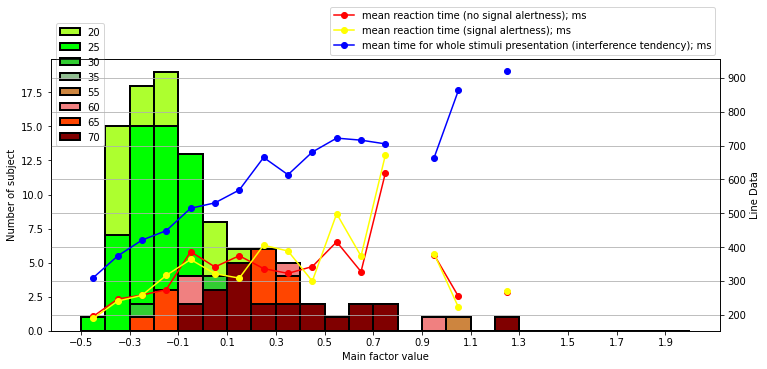

In [58]:
# 度数分布表  of pd

bins = np.linspace(-0.5, 2, 26)
scores = pd.Series(X_pca.T[0])
freq = scores.value_counts(bins=bins, sort=False)
class_value = [round(i, 2) for i in (bins[:-1] + bins[1:]) / 2]  # 階級値
rel_freq = freq / scores.count()  # 相対度数
cum_freq = freq.cumsum()  # 累積度数
rel_cum_freq = rel_freq.cumsum()  # 相対累積度数

classes = []
freqs = []
for i in age:
    scores20 = pd.Series(i)
    freq20 = scores20.value_counts(bins=bins, sort=False)
    class_value20 = [round(i, 2) for i in (bins[:-1] + bins[1:]) / 2]  # 階級値
    rel_freq20 = freq20 / scores20.count()  # 相対度数
    cum_freq20 = freq20.cumsum()  # 累積度数
    rel_cum_freq20 = rel_freq20.cumsum()  # 相対累積度数
    classes.append(class_value20)
    freqs.append(freq20)

dist = pd.DataFrame(
    {
        "階級値": class_value,
        "度数": freq,
        "相対度数": rel_freq,
        "累積度数": cum_freq,
        "相対累積度数": rel_cum_freq,
    },
    index=freq.index
)

fig, ax = plt.subplots(figsize=[12,5])

for i, j, k, color in zip(classes, freqs, np.arange(len(cog_df2['Age_1'].unique())),
                         ['greenyellow', 'lime', 'limegreen', 'darkseagreen', 'peru', 'lightcoral', 'orangered', 'maroon']):
    ax.bar(i, j, color=color, ec="k", width=0.1, lw=2, label=np.sort(cog_df2['Age_1'].unique())[k])

ax.set_ylabel('Number of subject')
ax.set_xlabel('Main factor value')
ax.set_xticks(np.arange(-0.5, 2, 0.2))
ax.legend(bbox_to_anchor=(0, 1.15), loc='upper left')

ax2 = ax.twinx()
ax2.plot(class_value20, bin_means_TAP_A_5, marker='o', color='red', linestyle='-', label='mean reaction time (no signal alertness); ms')
ax2.plot(class_value20, bin_means_TAP_A_10, marker='o', color='yellow', linestyle='-', label='mean reaction time (signal alertness); ms')
ax2.plot(class_value20, bin_means_TAP_A_15, marker='o', color='blue', linestyle='-', label='mean time for whole stimuli presentation (interference tendency); ms')
ax2.legend(bbox_to_anchor=(1, 1.21), loc='upper right')
ax2.set_ylabel('Line Data')
plt.grid()
plt.show()

In [130]:
cog_df2

,ID,Label,Age_1,TAPA,TAP_A_5,TAPA_bins,TAP_A_10,TAP_I_15
0,sub-032311,0.0,20,-0.235381,243.0,"(-0.3, -0.2]",233.0,361
1,sub-032309,2.0,20,0.103865,206.0,"(0.1, 0.2]",223.0,547
2,sub-032382,0.0,25,-0.224514,199.0,"(-0.3, -0.2]",211.0,399
3,sub-032302,0.0,20,-0.060740,211.0,"(-0.1, 0.0]",203.0,439
4,sub-032315,0.0,20,-0.350309,165.0,"(-0.4, -0.3]",157.0,318
...,...,...,...,...,...,...,...,...
221,sub-032304,1.0,25,-0.096677,235.0,"(-0.1, 0.0]",246.0,456
222,sub-032439,0.0,20,-0.250214,204.0,"(-0.3, -0.2]",225.0,376
223,sub-032440,0.0,25,-0.375662,204.0,"(-0.4, -0.3]",208.0,317
224,sub-032441,2.0,25,-0.101989,219.0,"(-0.2, -0.1]",265.0,445


In [132]:
cog_df2.to_csv('Attention.csv')

In [55]:
Meta = pd.read_csv('/workspace/brail_poc3/experiments/Behavioural_Data_MPILMBB_LEMON/META_File_IDs_Age_Gender_Education_Drug_Smoke_SKID_LEMON.csv')
Meta
# Meta.shape[0]

,Subject,Gender_ 1=female_2=male,Age,Handedness,Education,DRUG,DRUG_0=negative_1=Positive,Unnamed: 7,Smoking,"Smoking_num_(Non-smoker=1, Occasional Smoker=2, Smoker=3)",...,SKID_Diagnoses 1,SKID_Diagnoses 2,Comments_SKID_assessment,Hamilton_Scale,BSL23_sumscore,BSL23_behavior,AUDIT,Standard_Alcoholunits_Last_28days,Alcohol_Dependence_In_1st-3rd_Degree_relative,Relationship_Status
0,sub-032311,2,20-25,right,Gymnasium,negative,0,NaN,non-smoker,1.0,...,#CODE:V71.09 #DESC:No Diagnosis or Condition ...,NaN,NaN,0.0,NaN,NaN,12.0,47,No,No
1,sub-032309,2,20-25,right,Gymnasium,negative,0,NaN,occasional smoker,2.0,...,#CODE:V71.09 #DESC:No Diagnosis or Condition ...,NaN,NaN,0.0,NaN,NaN,12.0,45,Yes,Yes
2,sub-032382,2,25-30,right,Gymnasium,negative,0,NaN,occasional smoker,2.0,...,NaN,NaN,NaN,2.0,NaN,NaN,0.0,12,unknown,Yes
3,sub-032302,1,20-25,right,Gymnasium,negative,0,NaN,non-smoker,1.0,...,#CODE:V71.09 #DESC:No Diagnosis or Condition ...,NaN,NaN,3.0,NaN,NaN,1.0,0,No,No
4,sub-032315,2,20-25,right,Gymnasium,negative,0,NaN,non-smoker,1.0,...,#CODE:V71.09 #DESC:No Diagnosis or Condition ...,NaN,NaN,2.0,NaN,NaN,7.0,22,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,sub-032304,2,25-30,right,Gymnasium,negative,0,NaN,non-smoker,1.0,...,#CODE:V71.09 #DESC:No Diagnosis or Condition ...,NaN,NaN,0.0,4.0,0.0,1.0,1,No,No
224,sub-032439,2,20-25,left,Gymnasium,negative,0,NaN,non-smoker,1.0,...,#CODE:V71.09 #DESC:No Diagnosis or Condition ...,NaN,"suspected diagnosis: panic disorder, alcohol a...",1.0,4.0,1.0,5.0,18,no,no
225,sub-032440,2,25-30,left,Gymnasium,negative,0,NaN,non-smoker,1.0,...,#CODE:V71.09 #DESC:No Diagnosis or Condition ...,NaN,NaN,5.0,2.0,1.0,3.0,29,no,yes
226,sub-032441,2,25-30,right,Gymnasium,negative,0,NaN,non-smoker,1.0,...,#CODE:300.29 #DESC: Mild Specific phobia #SPEC...,NaN,subclinical specific phobia,3.0,3.0,1.0,3.0,"16,5",no,yes


In [58]:
CogTestBatDic = []
for i in range(Meta.shape[0]):
    TempDic = {}
    TempDic['SubNum'] = Meta['Subject'][i] # ID追加, SubNum
    
    for index_j, j in enumerate(CogTestBat):
        
    
    CogTestBatDic.append(TempDic)
CogTestBatDic

[{'SubNum': 'sub-032311'},
 {'SubNum': 'sub-032309'},
 {'SubNum': 'sub-032382'},
 {'SubNum': 'sub-032302'},
 {'SubNum': 'sub-032315'},
 {'SubNum': 'sub-032314'},
 {'SubNum': 'sub-032316'},
 {'SubNum': 'sub-032383'},
 {'SubNum': 'sub-032307'},
 {'SubNum': 'sub-032310'},
 {'SubNum': 'sub-032312'},
 {'SubNum': 'sub-032317'},
 {'SubNum': 'sub-032404'},
 {'SubNum': 'sub-032318'},
 {'SubNum': 'sub-032319'},
 {'SubNum': 'sub-032386'},
 {'SubNum': 'sub-032320'},
 {'SubNum': 'sub-032321'},
 {'SubNum': 'sub-032322'},
 {'SubNum': 'sub-032394'},
 {'SubNum': 'sub-032324'},
 {'SubNum': 'sub-032323'},
 {'SubNum': 'sub-032528'},
 {'SubNum': 'sub-032325'},
 {'SubNum': 'sub-032313'},
 {'SubNum': 'sub-032405'},
 {'SubNum': 'sub-032384'},
 {'SubNum': 'sub-032407'},
 {'SubNum': 'sub-032327'},
 {'SubNum': 'sub-032414'},
 {'SubNum': 'sub-032418'},
 {'SubNum': 'sub-032326'},
 {'SubNum': 'sub-032415'},
 {'SubNum': 'sub-032332'},
 {'SubNum': 'sub-032331'},
 {'SubNum': 'sub-032305'},
 {'SubNum': 'sub-032308'},
 